<a href="https://colab.research.google.com/github/Jsims398/CS-180-BYU-Projects/blob/main/JS_data_science_lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 12

In [ ]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

## Introduction:
In this lab you will fit regression models on multiple datasets.

## Exercise 1: Synthetic Data
First we will fit a regression model to multiple variants of a synthetic dataset. In each case, we know the true parameters (slope and intercept) and we will vary the noise of the data. Execute the following code to generate the data:

In [ ]:
import numpy as np

w_0_true = -2.5 # this is the TRUE intercept
w_1_true = 0.1 # this is the TRUE slope

def f_x(x, w_0, w_1, sig):
  n = len(x)
  y = w_1*x + w_0 + np.random.normal(0, sig, n)
  return y

x = np.arange(0, 100)


y_1 = f_x(x, w_0_true, w_1_true, sig=0.5) # standard deviation = 0.5
y_2 = f_x(x, w_0_true, w_1_true, sig=1.5) # standard deviation = 1.5
y_3 = f_x(x, w_0_true, w_1_true, sig=5.0) # standard deviation = 5
y_4 = f_x(x, w_0_true, w_1_true, sig=10.0) # standard deviation = 10

### Question 1a:
For each of the four datasets we generated do the following:

* Plot a scatter plot of `x` and `y_i` (e.g, `x` and `y_2`)

* Fit a [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) using sklearn (sklearn.linear_model.LinearRegression )

  * Make sure `fit_intercept` is set to `True`

  * hint: sklearn expects the features to be two-dimensional. You many need to use the following code to reshape your `x` array when training:

```
  reg = LinearRegression(fit_intercept=True)
  reg.fit(x.reshape(-1, 1), y) # reshape x to be two-dimensional
```
* Print the estimated coefficients:

  * These can be accessed with the `coef_` and `intercept_` attributes on the regression object

* Plot the regression line on the scatter plots of `x` and `y`

Comment on how well the regression model approximates the data

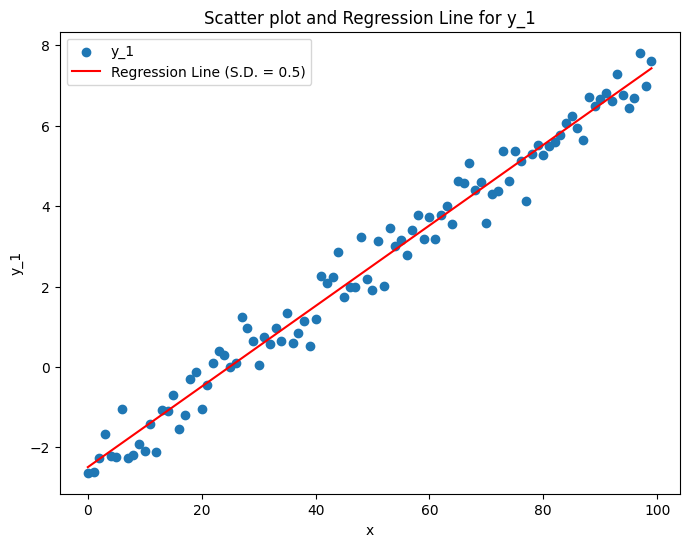

Coefficient (slope): 0.10020343980582434
Intercept: -2.4914756135002105



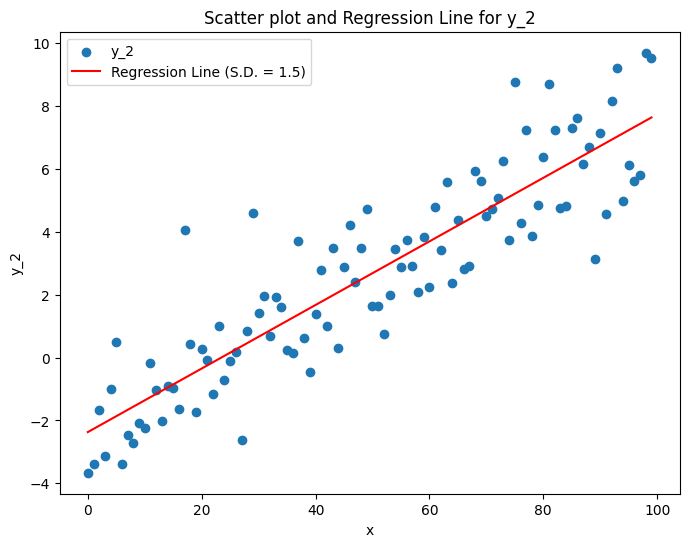

Coefficient (slope): 0.10099488245846984
Intercept: -2.369476625806192



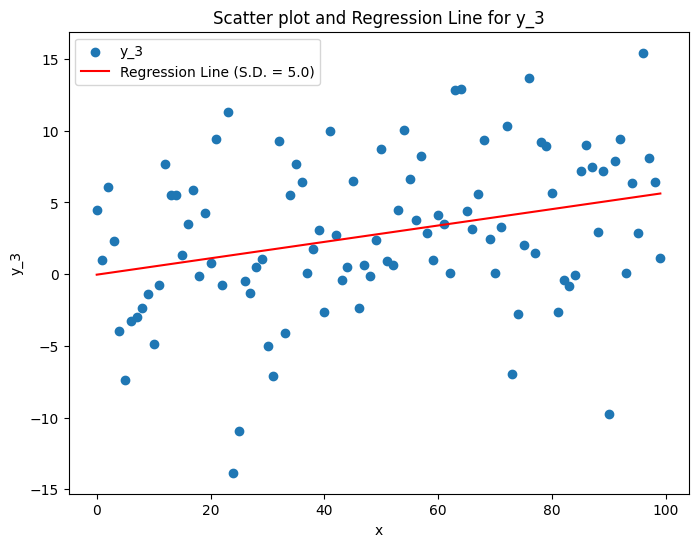

Coefficient (slope): 0.05717978885909537
Intercept: -0.03529118048372837



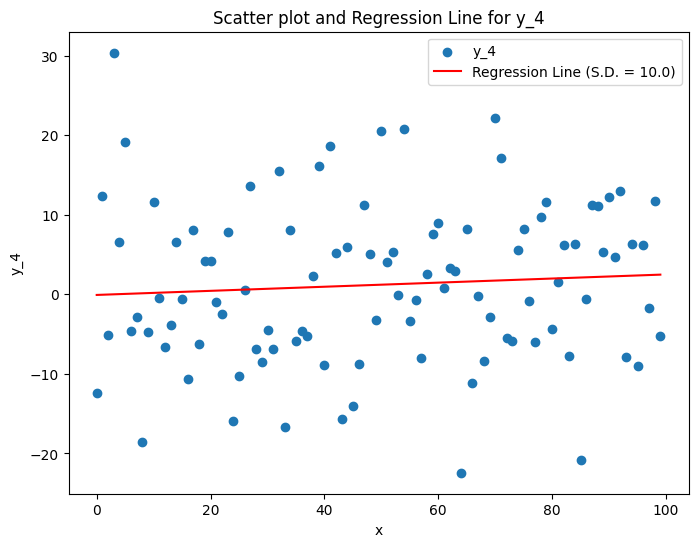

Coefficient (slope): 0.025776118794260065
Intercept: -0.07547717394835174



In [ ]:
datasets = [y_1, y_2, y_3, y_4]
sigmas = [0.5, 1.5, 5.0, 10.0]

for i, y in enumerate(datasets, start=1):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label=f"y_{i}")

    reg = LinearRegression(fit_intercept=True)
    reg.fit(x.reshape(-1, 1), y)

    coef = reg.coef_[0]
    intercept = reg.intercept_

    plt.plot(x, reg.predict(x.reshape(-1, 1)), color='red', label=f"Regression Line (S.D. = {sigmas[i-1]})")
    plt.title(f"Scatter plot and Regression Line for y_{i}")
    plt.xlabel('x')
    plt.ylabel(f'y_{i}')
    plt.legend()
    plt.show()
    print(f"Coefficient (slope): {coef}")
    print(f"Intercept: {intercept}\n")

### Question 1b:

What do you observe as we add noise to our generated dataset? How well are we able to recover the true parameters, `w_0_true` and `w_1_true` from the data as noise increases?

As noise increases the regression line can always be drawn however the coverage that line covers starts to less and less because the spread is larger and larger. Basicaly we could be getting further from the true parameters as we increase the noise.

# Exercise 2
Read the California Housing Data from the `sample_data` on every collab instance:

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
train = pd.read_csv("sample_data/california_housing_train.csv")
test = pd.read_csv("sample_data/california_housing_test.csv")

This dataset contains features on census tracts in California in the early 1990’s. The target is the variable `median_house_value` of each census tract.

### Exercise 2a:
Plot a [scatter_plot matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) using the training data. You may need to tune the `fig_size` argument to make the figure larger.

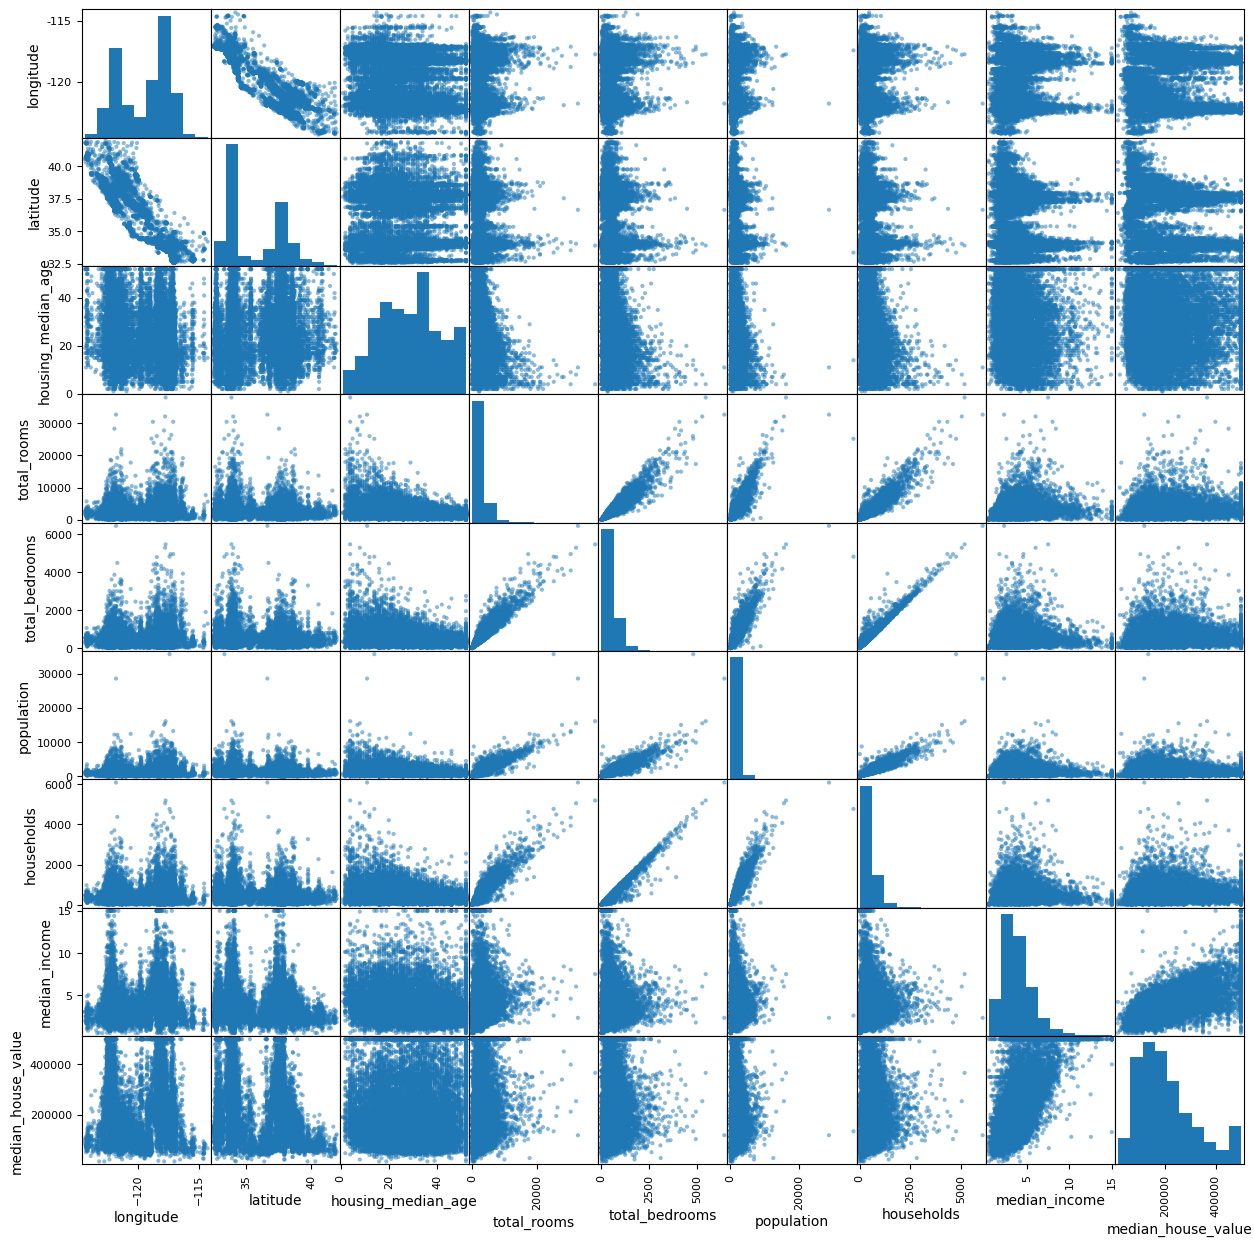

In [ ]:
scatter_matrix(train, figsize=(15, 15))
plt.show()

What variables appear to be correlated with `median_house_value`?

In [ ]:
correlations = train.corr()
median_house_value_correlations = correlations['median_house_value'].sort_values(ascending=False)
print(median_house_value_correlations)

median_house_value    1.000000
median_income         0.691871
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64


median_income seems to be the closest related to Median_house_value

What variables are not correlated with `median_house_value`?

total_rooms, housing_median_age, households, total_bedrooms, population, longitude, latitude. Because there correlation is closer to 0.

What features appear to be correlated with each other?

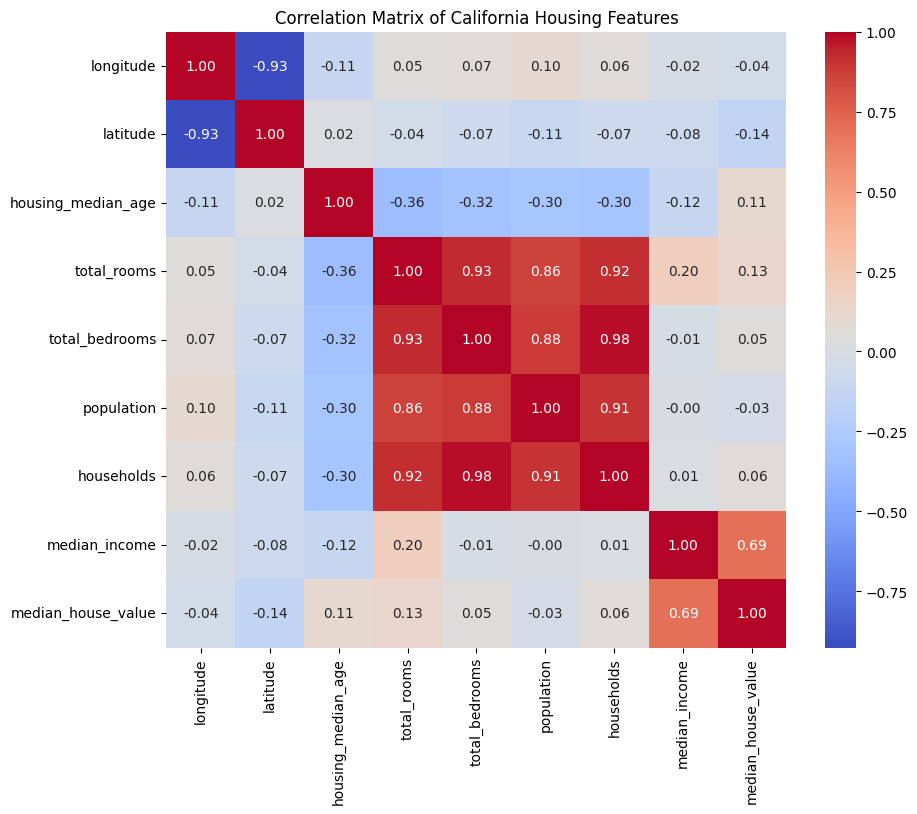

In [ ]:
import seaborn as sns
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of California Housing Features')
plt.show()

objects close to -1 or 1 are highly correlated where objects closer to 0 are not as correlated.

### Exercise 2b
Fit a linear regression model using `sklearn`.
* Fit a few different models (each with different features).
* Evaluate the [mean_squared_error](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) of your models with both the training and test set.

In [ ]:
features1 = ['housing_median_age', 'total_rooms', 'total_bedrooms']
features2 = ['median_income', 'households', 'population']

X_train1, X_test1 = train[features1], test[features1]
X_train2, X_test2 = train[features2], test[features2]
y_train, y_test = train['median_house_value'], test['median_house_value']

model1 = LinearRegression()
model2 = LinearRegression()

model1.fit(X_train1, y_train)
model2.fit(X_train2, y_train)

y_pred_train1 = model1.predict(X_train1)
y_pred_test1 = model1.predict(X_test1)
y_pred_train2 = model2.predict(X_train2)
y_pred_test2 = model2.predict(X_test2)

mse_train1 = mean_squared_error(y_train, y_pred_train1)
mse_test1 = mean_squared_error(y_test, y_pred_test1)
mse_train2 = mean_squared_error(y_train, y_pred_train2)
mse_test2 = mean_squared_error(y_test, y_pred_test2)

print(f"Model 1 - Training Set Mean Squared Error: {mse_train1:.2f}")
print(f"Model 1 - Test Set Mean Squared Error: {mse_test1:.2f}")
print(f"Model 2 - Training Set Mean Squared Error: {mse_train2:.2f}")
print(f"Model 2 - Test Set Mean Squared Error: {mse_test2:.2f}")


Model 1 - Training Set Mean Squared Error: 12253167823.75
Model 1 - Test Set Mean Squared Error: 11594362368.44
Model 2 - Training Set Mean Squared Error: 6497009941.91
Model 2 - Test Set Mean Squared Error: 6508224867.45


What did you observe? Which model yields the lowest test error?

Model 2 has a lower squared error so it is better at predicting what unseen data could be than model 1.


### Exercise 2c
Fit a linear regression using the `statsmodels` api.
* Print the model output using `print(results.summary())`

In [ ]:
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income', 'households', 'population']
X = train[features]
y = train['median_house_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     3775.
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:41:43   Log-Likelihood:            -2.1516e+05
No. Observations:               17000   AIC:                         4.303e+05
Df Residuals:                   16993   BIC:                         4.304e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.762e+04   2464

Comment on which features appear to have the strongest relationship with `median_house_value`?

median_age and medium_income both play a part to due to the higher coefficents.

Write a sentence interpreting the coefficient for `median_income`.

if we hold all other variables constant we are expected to see a change by 4.803e+04 up and down on the median house price when we change the median income by one unit.

In [ ]:
import numpy as np

# Simulate rolling two dice for n trials
n = 1000000  # Number of trials
dice_rolls = np.random.randint(1, 7, size=(n, 2))  # Simulate dice rolls

# Calculate the sum of the two dice for each trial
sum_of_dice = np.sum(dice_rolls, axis=1)

# Calculate the variance of the sum
variance = np.var(sum_of_dice)

print("Variance of the sum of two dice rolls:", variance)


Variance of the sum of two dice rolls: 5.822998505403997
